<a href="https://colab.research.google.com/github/fuku-nao/0826-kadai/blob/master/0826%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#画像の取得
!pip install icrawler
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "hashimoto_kannna"})
crawler.crawl(keyword="橋本環奈", max_num=20)
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "sasaki_nozomi"})
crawler.crawl(keyword="佐々木希", max_num=20)
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "horikita_maki"})
crawler.crawl(keyword="堀北真希", max_num=20)

2020-08-26 06:04:00,369 - INFO - icrawler.crawler - start crawling...
2020-08-26 06:04:00,370 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-08-26 06:04:00,380 - INFO - feeder - thread feeder-001 exit
2020-08-26 06:04:00,382 - INFO - icrawler.crawler - starting 1 parser threads...
2020-08-26 06:04:00,386 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-08-26 06:04:00,665 - INFO - parser - parsing result page https://www.bing.com/images/async?q=橋本環奈&first=0
2020-08-26 06:04:00,742 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Hashimoto_Kanna_at_Opening_Ceremony_of_the_Tokyo_International_Film_Festival_2017_%2840169184582%29.jpg
2020-08-26 06:04:03,079 - INFO - downloader - image #1	http://www.girlsnews.tv/reimage/w1000/img20131117hashimotokanna.jpg
2020-08-26 06:04:03,224 - INFO - downloader - image #2	https://cdn.snsimg.carview.co.jp/minkara/userstorage/000/042/000/663/75de8134c1.jpg
2020-

In [38]:
#画像の水増し
%matplotlib inline


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import numpy as np
import os


X_train=[]
Y_train=[]

X_test=[]
Y_test=[]

Mydribe ="/content/drive/My Drive/gazoubunrui"
l=os.listdir(Mydribe + "/original_data")

hashimoto_kannna
/content/drive/My Drive/gazoubunrui/original_data/hashimoto_kannna/000017.jpg


error: ignored

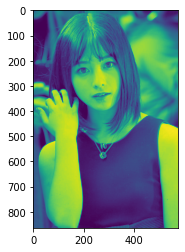

In [41]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
cascade_path=Mydribe +"/content/gazoubunrui/haarcascade_frontalface_alt.xml"

for i in l:
    result_dir=i.split(".")[0]
    print(result_dir)
    # os.mkdir(Mydribe + "/face/"+result_dir)
    os.makedirs(Mydribe + "/face/"+result_dir, exist_ok=True)

    m=os.listdir(Mydribe + "/original_data/"+i)
    n=0
    for target_file in m:
        origin_image=(Mydribe + "/original_data/"+i+"/"+target_file)
        print(origin_image)
        cascade=cv2.CascadeClassifier(cascade_path)
        image=cv2.imread(origin_image)

        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        plt.imshow(gray)

        facerect=cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=1,minSize=(10,10))

        for x,y,w,h in facerect:
            face=gray[y:y+h,x:x+w]
            face=cv2.resize(face,(128,128))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.flip(face,1)
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(face,(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(cv2.flip(face,1),(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1